In [67]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch as t

根据李宏毅《深度学习及其深层与结构化》第7课。深度线性网络在0点附近区域为平坦点，此时一阶为0，二阶为0。无法根据梯度决定往哪个方向移动。  
当只有一层隐藏层时，平坦区域仅为0点，只有当init_w=0时梯度无法下降。梯度稍微偏离0一点点，就可以正常下降了。  
当隐藏层数越来越多，平坦区域会越来越大。init_w落如此区域如同进入黑洞，无所适从。  

# 没有隐藏层，init_w = 0

In [68]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc1.weight,0)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        return x

In [73]:
def fit(net, criterion, optimizer, epoches=100):
    loss_scores = []
    for epoch in range(epoches):  # loop over the dataset multiple times
        x,y = 1,1
        inputs, labels = t.Tensor([[1]]), t.Tensor([1])
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        loss_scores.append(loss.item())
    print('Finished Training')
    return loss_scores

In [74]:
import torch.optim as optim
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
loss_scores = fit(net, criterion, optimizer)

Finished Training


/Users/windmissing/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


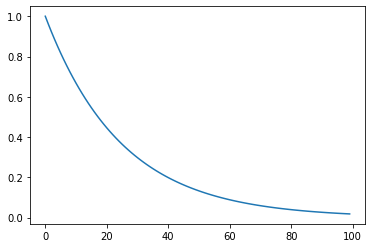

In [75]:
import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

# 1个隐藏层，init_w = 0

Finished Training


/Users/windmissing/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


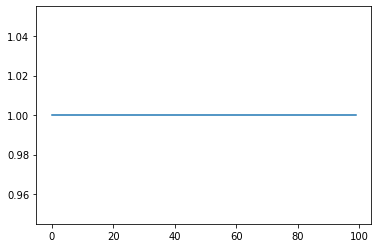

In [77]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc1.weight,0)
        self.fc2 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc2.weight,0)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
import torch.optim as optim
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-1)
loss_scores = fit(net, criterion, optimizer)

import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

# 1个隐藏层，init_w极小，增大学习率

Finished Training


/Users/windmissing/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


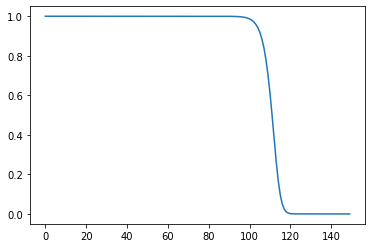

In [110]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc1.weight,1e-9)
        self.fc2 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc2.weight,1e-9)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
import torch.optim as optim
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-1)
loss_scores = fit(net, criterion, optimizer, epoches=150)

import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

# 4个隐藏层，init_w为正态分布，方差极小

Finished Training


/Users/windmissing/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


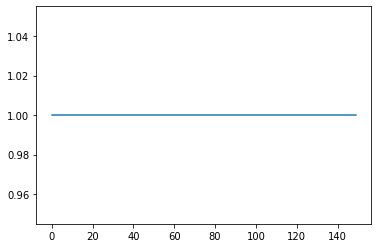

In [111]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc1.weight,1e-9)
        self.fc2 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc2.weight,1e-9)
        self.fc3 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc3.weight,1e-9)
        self.fc4 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc4.weight,1e-9)
        self.fc5 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc5.weight,1e-9)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
import torch.optim as optim
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-1)
loss_scores = fit(net, criterion, optimizer, epoches=150)

import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

# 4个隐藏层，init_w为正态分布，增大学习率

Finished Training


/Users/windmissing/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


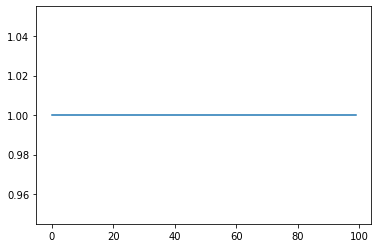

In [112]:
class Net(nn.Module):
    def __init__(self, p):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc1.weight,1e-9)
        self.fc2 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc2.weight,1e-9)
        self.fc3 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc3.weight,1e-9)
        self.fc4 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc4.weight,1e-9)
        self.fc5 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc5.weight,1e-9)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
import torch.optim as optim
net = Net(1e-9)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 1e3)
loss_scores = fit(net, criterion, optimizer, epoches=100)

import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()

# 4个隐藏层，init_w为正态分布，增大学习率，增大方差

Finished Training


/Users/windmissing/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


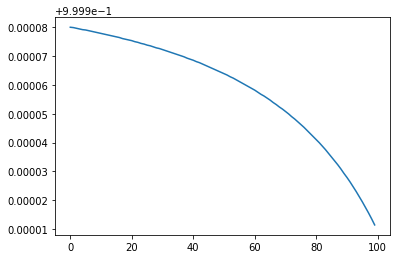

In [117]:
class Net(nn.Module):
    def __init__(self, p):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc1.weight,p)
        self.fc2 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc2.weight,p)
        self.fc3 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc3.weight,p)
        self.fc4 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc4.weight,p)
        self.fc5 = nn.Linear(1, 1, bias=False)
        nn.init.constant_(self.fc5.weight,p)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
import torch.optim as optim
net = Net(1e-1)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 1e0)
loss_scores = fit(net, criterion, optimizer, epoches=100)

import matplotlib.pyplot as plt

plt.plot(loss_scores)
plt.show()